<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_maximum_absolute_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The maximum absolute scaling**

- The maximum absolute scaling rescales each feature between **-1 and 1** by dividing every observation by its maximum absolute value.

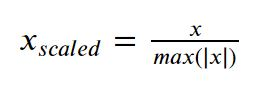

- We can apply the **maximum absolute scaling** in **Pandas** using the **.max() and .abs()** methods, as shown below.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data frame containing the odometer reading (km) and the fuel economy (km/l) of second-hand cars
df_cars = pd.DataFrame([[120000, 11], [250000, 11.5], [175000, 15.8], [350000, 17], [400000, 10]],
                       columns=['odometer_reading', 'fuel_economy'])

df_cars

,odometer_reading,fuel_economy
0,120000,11.0
1,250000,11.5
2,175000,15.8
3,350000,17.0
4,400000,10.0


### **PANDAS**

In [4]:
# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
    
# call the maximum_absolute_scaling function
df_cars_scaled = maximum_absolute_scaling(df_cars)

df_cars_scaled

,odometer_reading,fuel_economy
0,0.3000,0.647059
1,0.6250,0.676471
2,0.4375,0.929412
3,0.8750,1.000000
4,1.0000,0.588235


### **SCIKIT**

- Alternatively, we can use the Scikit-learn library to compute the maximum absolute scaling. First, we create an abs_scaler with the MaxAbsScaler class. Then, we use the fit method to learn the required parameters for scaling the data (the maximum absolute value of each feature). Finally, we transform the data using those parameters.

In [5]:
from sklearn.preprocessing import MaxAbsScaler

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df_cars)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([4.0e+05, 1.7e+01])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df_cars)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df_cars.columns)

# visualize the data frame
df_scaled

,odometer_reading,fuel_economy
0,0.3000,0.647059
1,0.6250,0.676471
2,0.4375,0.929412
3,0.8750,1.000000
4,1.0000,0.588235


- As you can observe, we obtain the same results using Pandas and Scikit-learn.
 
- The following plot shows the transformed data after performing the maximum absolute scaling.

Text(0.5, 1.0, 'The scaling')

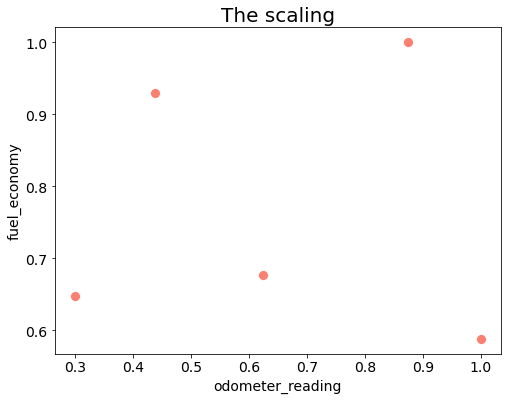

In [6]:
plt.figure(figsize=(8,6))
# scatter plot of the data after applying min-max scaling
sns.scatterplot(x='odometer_reading', y='fuel_economy', data=df_scaled, s=100, color='salmon')

# xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('odometer_reading', fontsize=14)
plt.ylabel('fuel_economy', fontsize=14)
plt.title('The scaling', fontsize=20)